# **CROP RECOMMENDATION SYSTEM**

#  **SPRINT RELEASE 1**

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd   #import various Libaries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import missingno as msn
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

**READ THE CSV FILE**

In [ ]:
crop = pd.read_csv("/content/Crop_recommendation.csv")  #The code reads a CSV file
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


**EXPLORING THE DATA**

In [ ]:
crop.shape   # returns the dimensions

(2200, 8)

- Total Rows: 2200
- Total Columns: 8

In [ ]:
crop.describe()   # generates a summary statistics table

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


- `crop.describe()` generates a summary statistics table for numerical columns in the 'crop' DataFrame.
- It provides information such as count, mean, standard deviation, minimum, and maximum values for each numerical column.
- Additionally, it includes quartiles, offering insights into the data distribution.

In [ ]:
crop.dtypes  # display the data types

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
crop['label'].value_counts()   # count of each unique value in the 'label' column

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

- The output indicates a class distribution of crop types in the dataset.
- There are 22 crop types in the dataset.
- The distribution is perfectly balanced, with each type having an equal representation of 100 instances.

**CHECKING FOR NULL VALUES**

In [ ]:
crop.isnull().sum()  # counts the number of missing(null) values in each column

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

- There are no missing values in any of the columns in the dataset.
- All features have zeros, indicating the absence of missing data.

In [ ]:
crop.duplicated().sum()   # This code calculates and returns the number of duplicated rows

0

- The output "0" signifies that there are no duplicated rows in the dataset.
- This suggests that each row in the DataFrame is unique.

In [ ]:
crop.info()   #This code provides a summary of information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


- 'crop' DataFrame has 2,200 entries and 8 columns.
- Data types in the DataFrame include integers and floats.
- There are no missing values in the dataset.
- The total memory usage is approximately 137.6 KB, indicating a well-structured and complete dataset.

In [ ]:
crop.columns   #This code returns the list of column names

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

- The DataFrame contains columns representing various attributes, including:
  - Nitrogen (N)
  - Phosphorous (P)
  - Potassium (K)
  - Temperature
  - Humidity
  - pH
  - Rainfall
  - A label for crop classification.

In [ ]:
crop.corr()   #This code computes and shows the correlation between columns

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


- The correlation matrix displays the pairwise correlations between numerical columns in the 'crop' dataset.
- It provides insight into the degree of linear relationship between these columns, helping to understand how they are related to each other.

In [ ]:
class_distribution = crop['label'].value_counts() #This code calculates and displays the distribution of classes
print("Class Distribution:")
print(class_distribution)

Class Distribution:
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


- This code is used to assess the balance or imbalance among different classes in the dataset.
- In this specific case, it indicates that the dataset is balanced, with an equal representation of instances across all classes.

In [ ]:
crop_summary=pd.pivot_table(crop,index=['label'],aggfunc='mean')
crop_summary     #This code generates a summary table,that calculates the mean feature values for each class

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


- The displayed value represents the mean of all labels in the dataset.

# **VISUALIZATION OF DATASET**

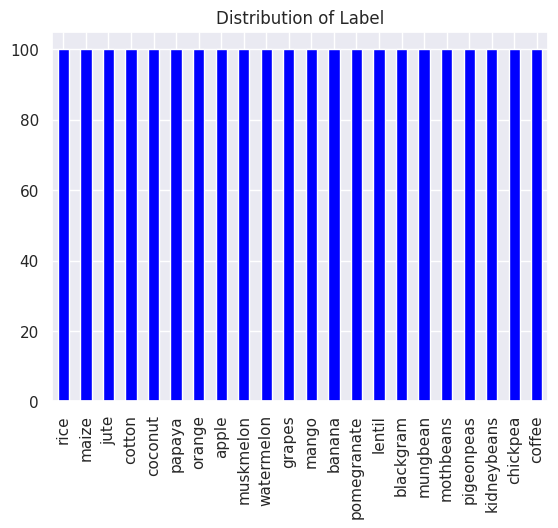

In [ ]:
crop['label'].value_counts().plot.bar(color='blue')  #Bar plot
plt.title("Distribution of Label");

**Bar Plot:**
- A bar plot is used to visualize the class distribution of the target variable in the dataset.
- Each crop type maintains an equal count of 100, ensuring a balanced representation across different crop types.

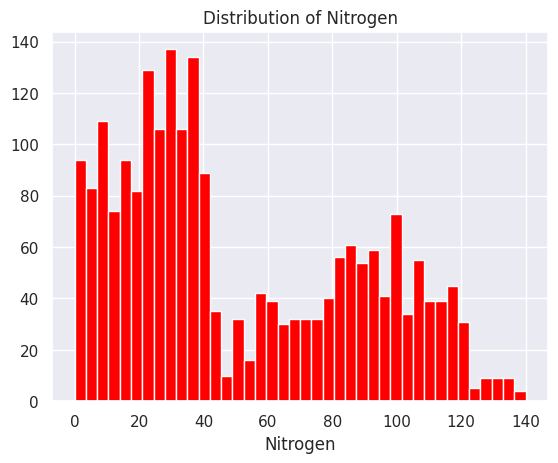

In [ ]:
crop['N'].hist(bins=40, color='red')   #Histogram to display N
plt.title("Distribution of Nitrogen")
plt.xlabel("Nitrogen");

**Histogram**
- The histogram of Nitrogen in the dataset shows the distribution of Nitrogen values.
- It reveals that the range of 20 to 40 experiences the highest frequency of occurrences.
- The peak Nitrogen value is observed in the range of 120 to 140.

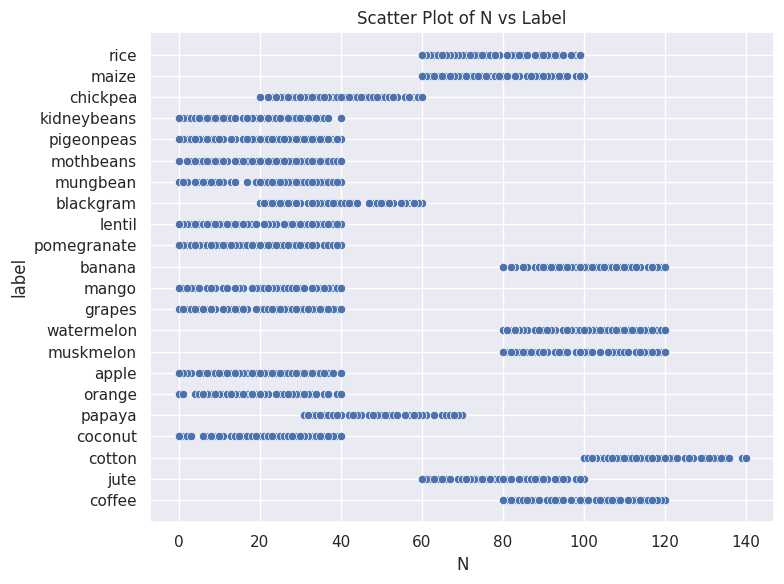

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
sns.scatterplot(data=crop, x="N", y="label")    #Scatter plot
plt.xlabel('N')
plt.ylabel('label')
plt.title('Scatter Plot of N vs Label')
plt.tight_layout()
plt.show()

**Scatter Plot of Nitrogen Vs Label:**
- The Scatter Plot of Nitrogen vs. Label visually represents the distribution of labels in relation to their corresponding Nitrogen counts.
- Nitrogen values falling within the range of 20 to 40 on the x-axis indicate a higher likelihood for successful crop cultivation, as denoted by the crop labels on the y-axis.
- This plot helps to visualize the relationship between Nitrogen levels and the success of crop cultivation.

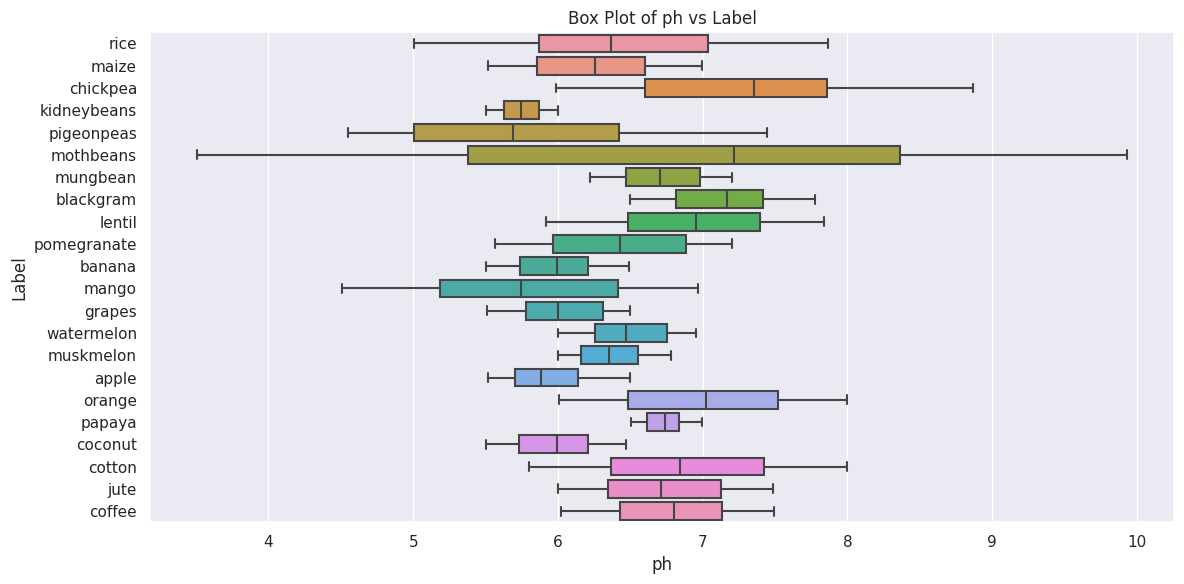

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
sns.boxplot(data=crop, x="ph", y="label", showfliers=False)  # Box plot for ph
plt.xlabel('ph')
plt.ylabel('Label')
plt.title('Box Plot of ph vs Label')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")

**Boxplot of ph Vs Label:**
- The Boxplot of pH vs. Label provides an analysis of the relationship between pH levels and crop labels.
- It indicates that the optimal pH range for successful crop cultivation falls between 6 to 7.
- This suggests that a pH level in this range is favorable for crops, as it is associated with the best outcomes.

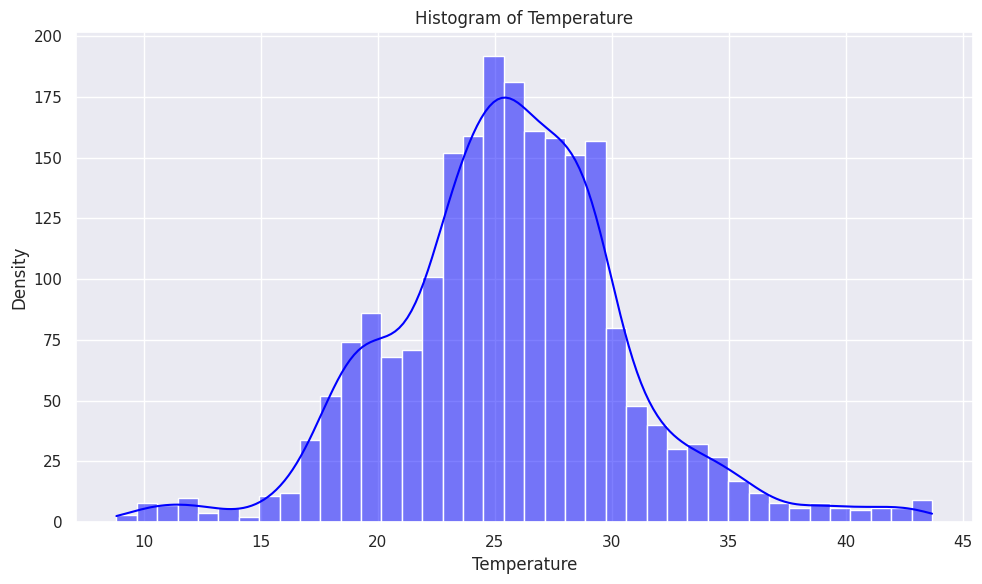

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

sns.histplot(data=crop, x="temperature", kde=True, color="blue")  # Histogram with KDE (Kernel Density Estimation)
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.title('Histogram of Temperature')

plt.tight_layout()
plt.show()



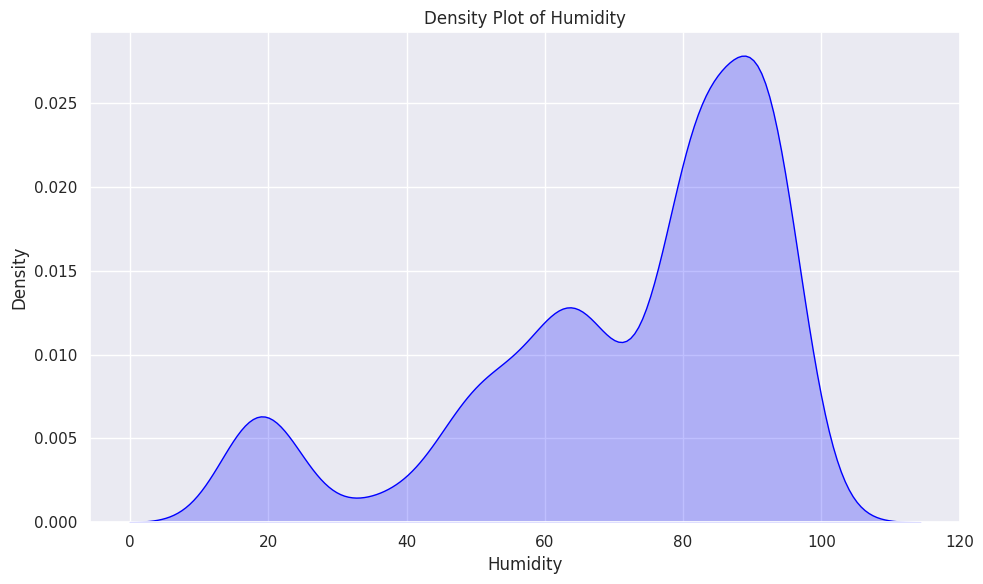

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.kdeplot(data=crop, x="humidity", color="blue", fill=True)  #Density plot
plt.xlabel('Humidity')
plt.ylabel('Density')
plt.title('Density Plot of Humidity')
plt.tight_layout()
plt.show()

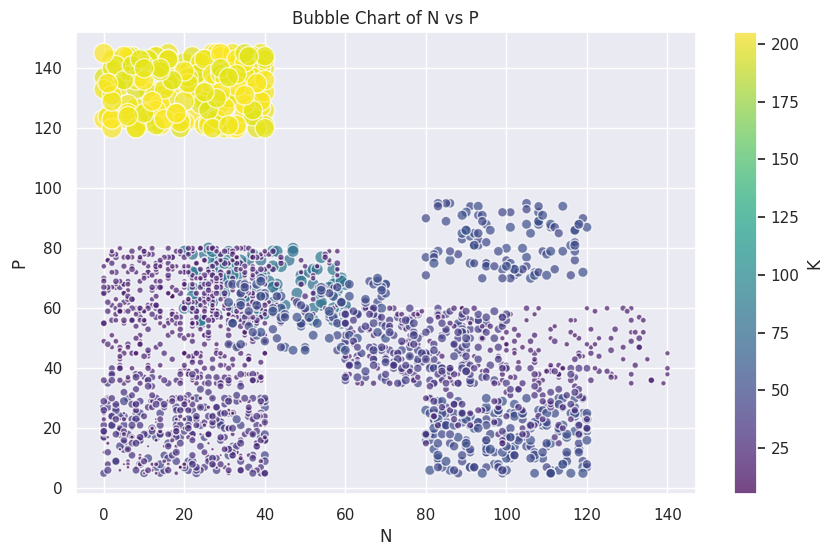

In [ ]:
x_column = 'N'
y_column = 'P'
size_column = 'K'
x = crop[x_column]
y = crop[y_column]
sizes = crop[size_column]
palette = sns.color_palette("viridis", as_cmap=True)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=sizes, c=sizes, cmap=palette, alpha=0.7, edgecolors='w')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Bubble Chart of {x_column} vs {y_column}')
plt.colorbar(label=size_column)
plt.grid(True)

plt.show()


**Bubble chart of N Vs P:**
- Bubble chart visualizing the relationship between 'N' and 'P'.
- Bubble sizes indicate the values of 'K', highlighting its impact.
- Bubble colors determined by 'K' values using the "viridis" color palette.
- Lighter colors (e.g., yellow) for lower 'K' values, darker colors (e.g., purple) for higher 'K' values.
- The gradual color transition aids in perceiving data variations.

In [ ]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)


In [ ]:
class_distribution = crop['crop_num'].value_counts() #This code calculates and displays the distribution of classes
print("Class Distribution:")
print(class_distribution)

Class Distribution:
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: crop_num, dtype: int64


**OUTLIERS**

In [ ]:
import plotly.express as px

#Plotly to create individual box plots for each of the specified features (N, P, K, temperature, humidity, ph, and rainfall)
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for feature in features:
    fig = px.box(crop, y=feature, points="all", title=f"Box Plot for {feature}")
    fig.show()

**COUNT OF OUTLIERS**

In [ ]:
# List of numerical features
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Calculate IQR for each numerical feature
Q1 = crop[numerical_features].quantile(0.25)
Q3 = crop[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each feature
outliers = (crop[numerical_features] < lower_bound) | (crop[numerical_features] > upper_bound)

# Recommendations based on outliers
for feature in numerical_features:
    # Identify rows with outliers for the current feature
    rows_with_outliers = crop[outliers[feature]]

    if feature == 'N':
        print("Recommendation for N:")

    elif feature == 'P':
        print("Recommendation for P:")

    elif feature == 'K':
        print("Recommendation for K:")

    elif feature == 'temperature':
        print("Recommendation for temperature:")

    elif feature == 'humidity':
        print("Recommendation for humidity:")

    elif feature == 'ph':
        print("Recommendation for ph:")

    elif feature == 'rainfall':
        print("Recommendation for rainfall:")

# Count and print the number of outliers for each feature
outliers_count = outliers.sum()
print("Number of outliers for each feature:")
print(outliers_count)


Recommendation for N:
Recommendation for P:
Recommendation for K:
Recommendation for temperature:
Recommendation for humidity:
Recommendation for ph:
Recommendation for rainfall:
Number of outliers for each feature:
N                0
P              138
K              200
temperature     86
humidity        30
ph              57
rainfall       100
dtype: int64


*SUMMARY*
- Feature 'N' has 0 outliers.
- Feature 'P' has 138 outliers.
- Feature 'K' has 200 outliers.
- Feature 'temperature' has 86 outliers.
- Feature 'humidity' has 30 outliers.
- Feature 'pH' has 57 outliers.
- Feature 'rainfall' has 100 outliers.


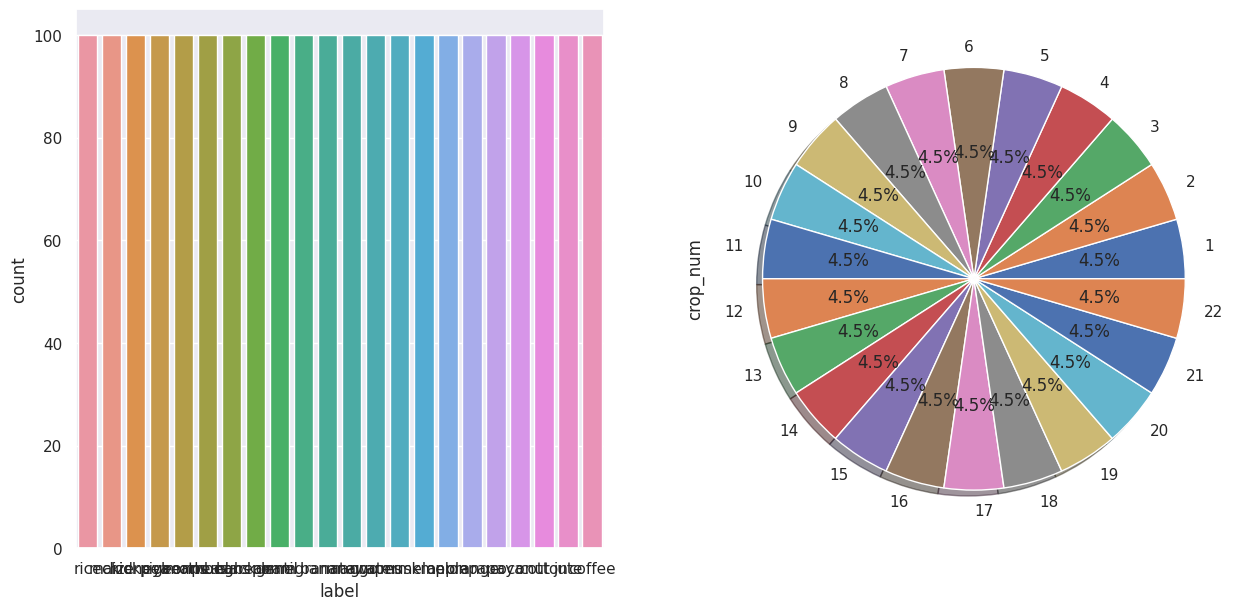

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'crop' with a column 'label' containing your labels

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

sns.countplot(data=crop, x="label", ax=ax[0])
crop['crop_num'].value_counts().plot.pie(autopct="%1.1f%%", shadow=True, ax=ax[1])

plt.show()

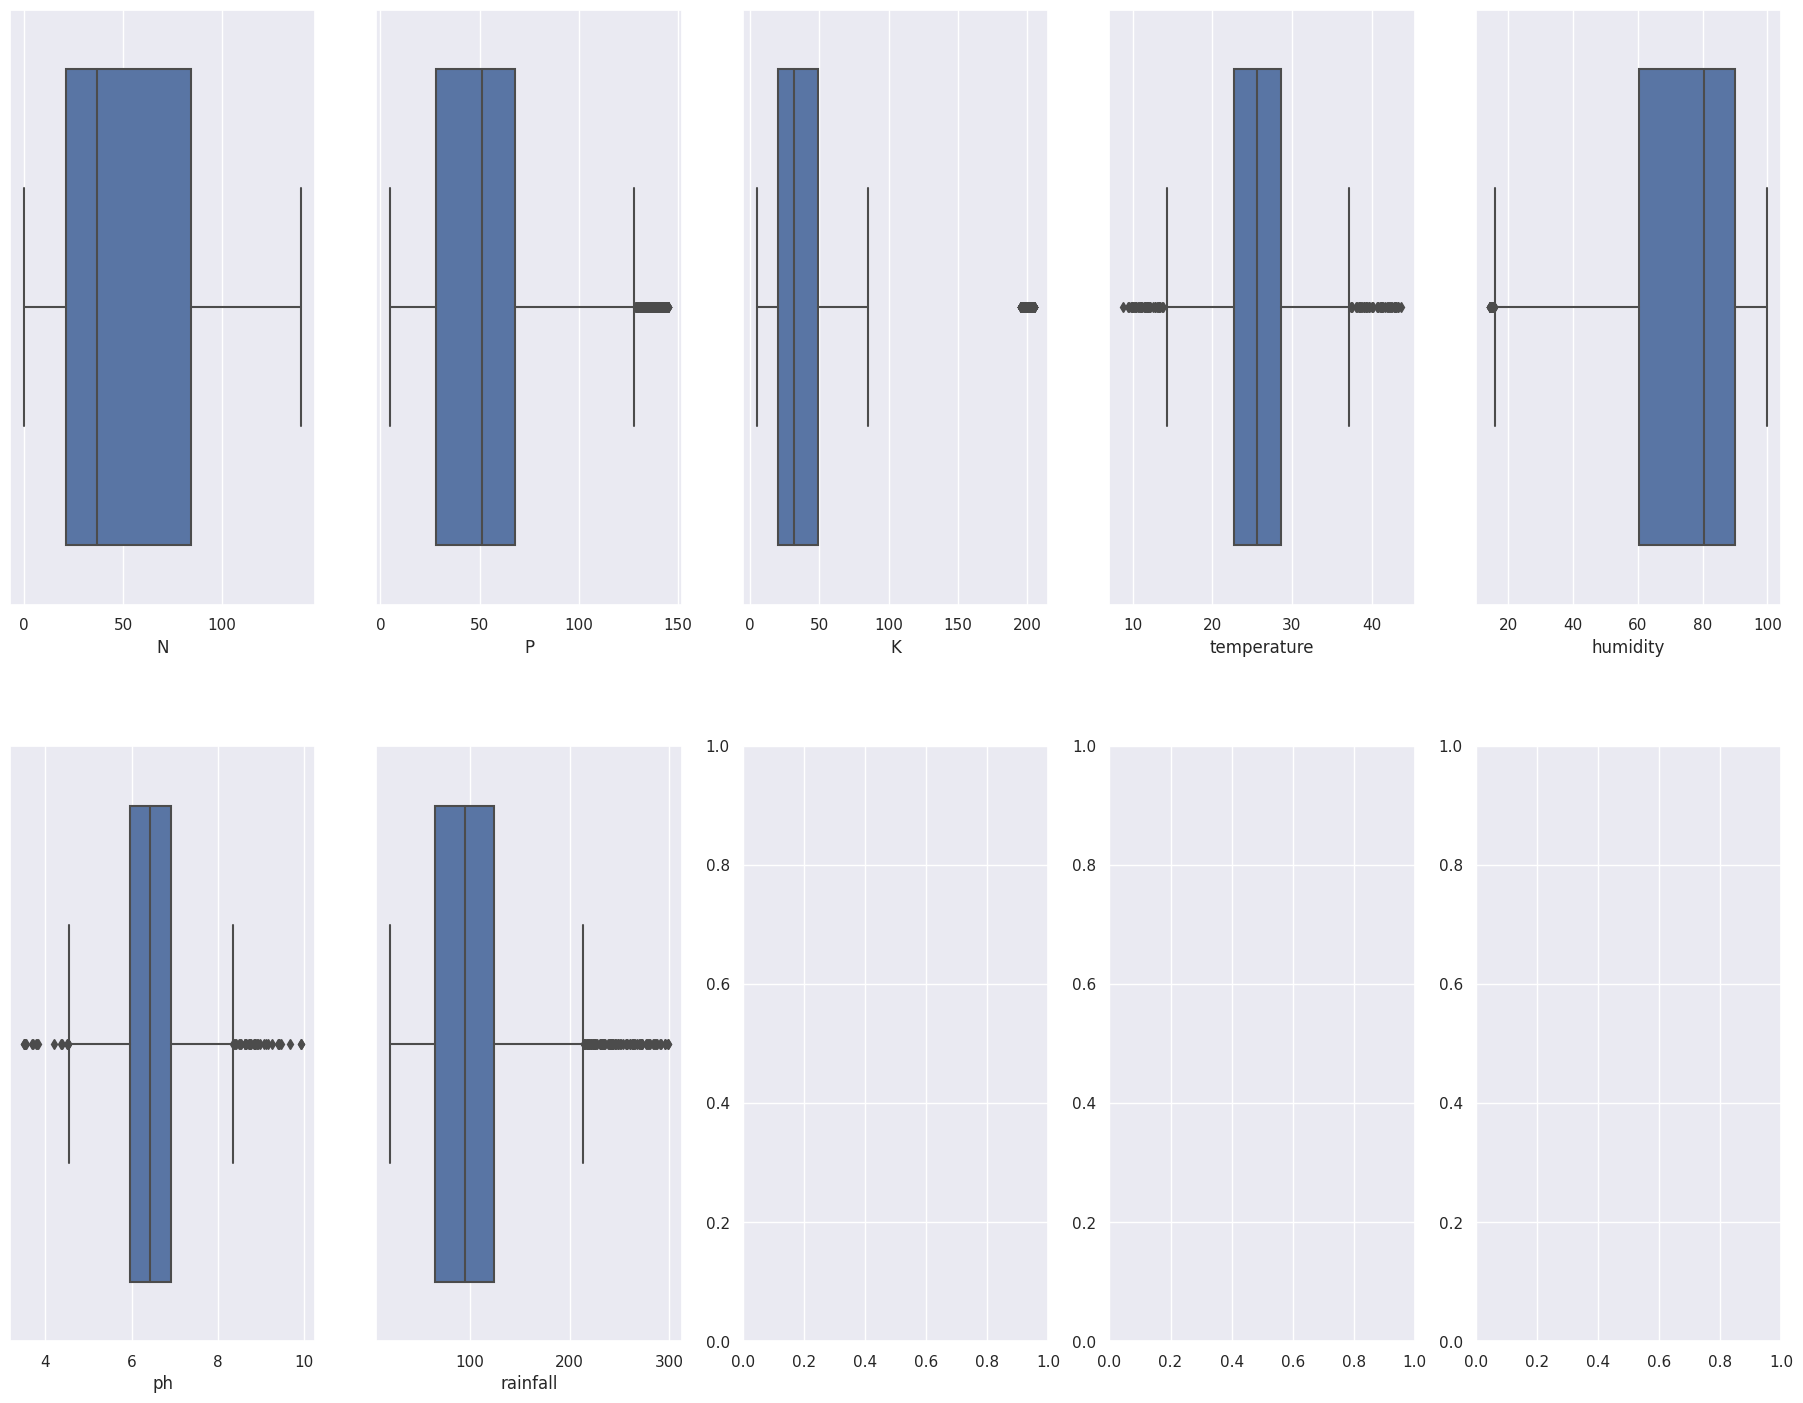

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'crop' with columns 'N', 'P', 'K', 'temperature', 'humidity', 'Ph', and 'rainfall'
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows=2, ncols=5, figsize=(18, 14))
sns.set_theme(style="darkgrid")

sns.boxplot(data=crop, x="N", ax=ax1)
sns.boxplot(data=crop, x="P", ax=ax2)
sns.boxplot(data=crop, x="K", ax=ax3)
sns.boxplot(data=crop, x="temperature", ax=ax4)
sns.boxplot(data=crop, x="humidity", ax=ax5)
sns.boxplot(data=crop, x="ph", ax=ax6)
sns.boxplot(data=crop, x="rainfall", ax=ax7)

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

**Code for Outlier Detection and Removal in a DataFrame**

In [ ]:
import numpy as np

# List of features to remove outliers from
features_to_process = ['rainfall', 'ph', 'temperature', 'K', 'P','humidity']

# Detection and removal for each feature
for feature in features_to_process:
    # Print the old shape for the current feature
    print(f"Old Shape ({feature}):", crop.shape)

    Q1 = np.percentile(crop[feature], 25, interpolation='midpoint')
    Q3 = np.percentile(crop[feature], 75, interpolation='midpoint')
    IQR = Q3 - Q1

    # Upper bound
    upper_bound = np.where(crop[feature] >= (Q3 + 1.5 * IQR))

    # Lower bound
    lower_bound = np.where(crop[feature] <= (Q1 - 1.5 * IQR))

    crop.reset_index(drop=True, inplace=True)

    # Then, remove the outliers using the specified indices for the current feature
    crop.drop(upper_bound[0], inplace=True)
    crop.drop(lower_bound[0], inplace=True)

    # Print the new shape for the current feature
    print(f"New Shape ({feature}):", crop.shape)

# Print the final shape of the DataFrame after processing all features
print("Final Shape:", crop.shape)


Old Shape (rainfall): (2200, 9)
New Shape (rainfall): (2101, 9)
Old Shape (ph): (2101, 9)
New Shape (ph): (2042, 9)
Old Shape (temperature): (2042, 9)
New Shape (temperature): (1962, 9)
Old Shape (K): (1962, 9)
New Shape (K): (1796, 9)
Old Shape (P): (1796, 9)
New Shape (P): (1796, 9)
Old Shape (humidity): (1796, 9)
New Shape (humidity): (1796, 9)
Final Shape: (1796, 9)


- **Old Shape (feature)**: For each selected feature (in this case, 'rainfall,' 'ph,' 'temperature,' 'K,' 'P,' and 'humidity'), the "Old Shape" indicates the number of rows and columns in the DataFrame before outlier removal.

- **New Shape (feature)**: After applying outlier detection and removal for each feature, the "New Shape" represents the updated number of rows and columns in the DataFrame. It shows the DataFrame's size after removing the identified outliers for that specific feature.

- **Final Shape**: This line displays the ultimate shape of the DataFrame after processing all the selected features for outlier detection and removal. It reflects the cumulative effect of removing outliers from all the specified features.


**Code for Counting Outliers in Selected Features.**

In [ ]:
import numpy as np

# List of features for which you want to count outliers
features_to_process = ['rainfall', 'ph', 'temperature', 'K', 'P']

# Create a dictionary to store the number of outliers for each feature
outliers_count_dict = {}

for feature_name in features_to_process:
    # Calculate the IQR for the current feature
    Q1 = np.percentile(crop[feature_name], 25, interpolation='midpoint')
    Q3 = np.percentile(crop[feature_name], 75, interpolation='midpoint')
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers for the current feature
    outliers_count = len(crop[(crop[feature_name] < lower_bound) | (crop[feature_name] > upper_bound)])

    # Store the count in the dictionary
    outliers_count_dict[feature_name] = outliers_count

# Print the number of outliers for each feature
for feature_name, count in outliers_count_dict.items():
    print(f"Number of outliers in {feature_name}: {count}")


Number of outliers in rainfall: 3
Number of outliers in ph: 9
Number of outliers in temperature: 9
Number of outliers in K: 26
Number of outliers in P: 0


- 3 outliers in the 'rainfall' feature
- 9 outliers in 'ph'
- 9 outliers in 'temperature'
- 26 outliers in 'K'
- No outliers in 'P'

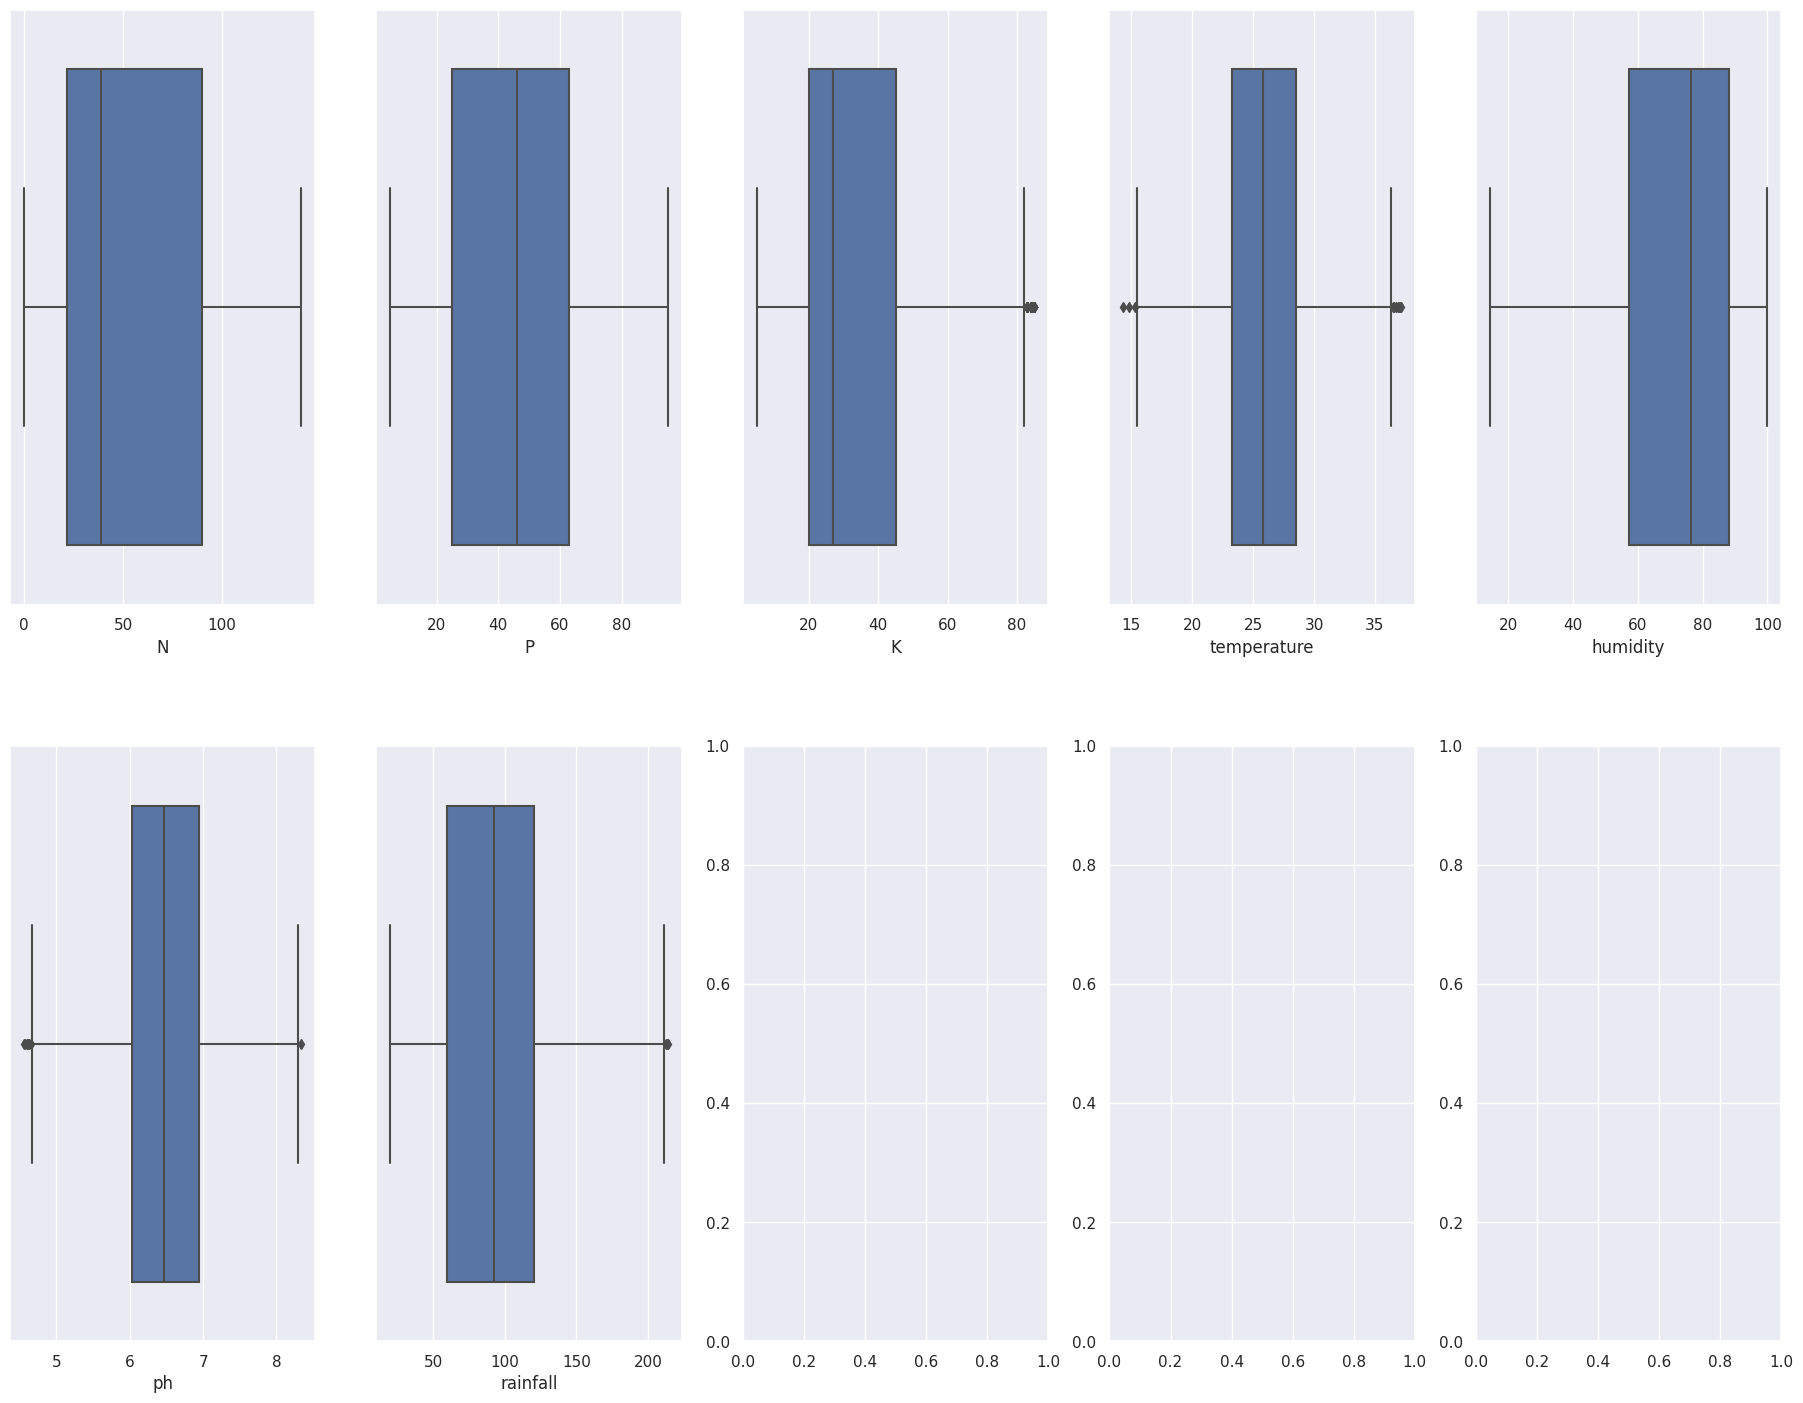

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'crop' with columns 'N', 'P', 'K', 'temperature', 'humidity', 'Ph', and 'rainfall'
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows=2, ncols=5, figsize=(18, 14))
sns.set_theme(style="darkgrid")

sns.boxplot(data=crop, x="N", ax=ax1)
sns.boxplot(data=crop, x="P", ax=ax2)
sns.boxplot(data=crop, x="K", ax=ax3)
sns.boxplot(data=crop, x="temperature", ax=ax4)
sns.boxplot(data=crop, x="humidity", ax=ax5)
sns.boxplot(data=crop, x="ph", ax=ax6)
sns.boxplot(data=crop, x="rainfall", ax=ax7)

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [ ]:
class_distribution = crop['crop_num'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
13    100
15    100
3     100
4     100
9     100
10    100
2     100
14    100
22    100
16    100
17    100
20    100
19     99
12     97
21     87
5      86
7      83
18     58
6      54
1      32
Name: crop_num, dtype: int64


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'crop' with a column 'label' for labels

# Count the class distribution
class_distribution = crop['crop_num'].value_counts()

# Check if the dataset is balanced
is_balanced = all(class_distribution == class_distribution.iloc[0])

if is_balanced:
    print("The dataset is balanced.")
else:
    print("The dataset is not balanced.")


The dataset is not balanced.


**Code for Random Oversampling to Address Class Imbalance**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

X = crop.drop('crop_num', axis=1)
y = crop['crop_num']

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and apply the random oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Now you have a balanced dataset
# You can use X_resampled and y_resampled for model training



# **SPRINT RELEASE 2**

**Train Test Split**

In [ ]:
# Split the data into training and testing sets
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1796, 7) (1077, 7) (719, 7)


- The original dataset X has 1796 samples and 7 features.
- The training dataset X_train contains 1077 samples and 7 features.
- The testing dataset X_test comprises 719 samples and 7 features.

In [ ]:
#Apply SMOTE for oversampling to balance the dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

- The code encodes categorical features and prepares the dataset for a classification machine learning task.
- The code uses SMOTE to address class imbalance, ensuring a balanced distribution of target classes.


In [ ]:
print(X_test_resampled.shape,y_test_resampled.shape)

(880, 7) (880,)


In [ ]:
#Example of checking the class distribution in the balanced dataset
print("Class distribution in the balanced dataset:")
print(y_train_resampled.value_counts())

Class distribution in the balanced dataset:
18    68
12    68
1     68
17    68
15    68
13    68
2     68
22    68
20    68
9     68
7     68
14    68
6     68
3     68
4     68
5     68
16    68
19    68
21    68
10    68
Name: crop_num, dtype: int64


- It display the class distribution in the balanced training dataset.

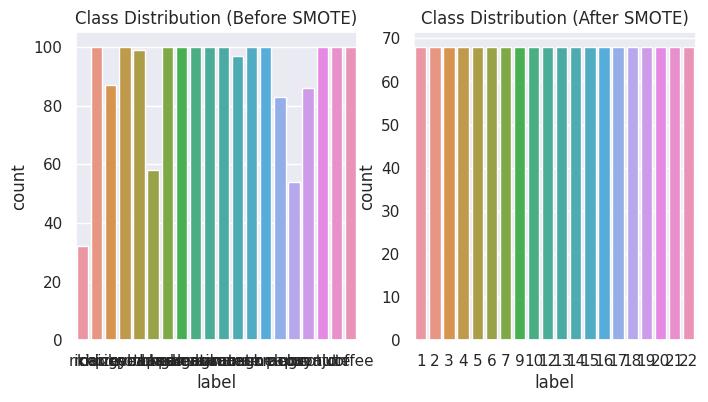

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=crop, x="label")
plt.title("Class Distribution (Before SMOTE)")

# Create a new DataFrame to show the class distribution after SMOTE
balanced_df = pd.DataFrame({'label': y_train_resampled})

# Countplot to show class distribution after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(data=balanced_df, x="label")
plt.title("Class Distribution (After SMOTE)")

plt.show()


#**Training Testing Model using Random Forest**

In [ ]:
#Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Fit the Random Forest model to your resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

**Model Evaluation**

**Accuracy Score of Training Data**

In [ ]:
# Make predictions on the training set
train_predictions = rf_model.predict(X_train_resampled)

In [ ]:
# Calculate and print the accuracy of the Random Forest model on the resampled training data
train_accuracy = accuracy_score(y_train_resampled, train_predictions)
print(f"Random Forest Training Accuracy: {train_accuracy}")


Random Forest Training Accuracy: 1.0


The Random Forest classifier achieved a remarkable accuracy of approximately 100% on the train dataset



**Accuracy Score of Testing Data**

In [ ]:
# Make predictions on the testing set
test_predictions = rf_model.predict(X_test_resampled)

In [ ]:
# Calculate and print the accuracy of the Random Forest model on the resampled testing data
test_accuracy = accuracy_score(y_test_resampled, test_predictions)
print(f"Random Forest Testing Accuracy: {test_accuracy}")


Random Forest Testing Accuracy: 0.9761363636363637


- A testing accuracy of 97.61 suggests that the Random Forest model has learned the training data with perfect accuracy.


**Confusion Matrix for Random Forest**

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on the resampled training set
train_predictions = rf_model.predict(X_train_resampled)

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_train_resampled, train_predictions)

# Display the confusion matrix
print("Confusion Matrix (Training Data):")
print(confusion_matrix_result)



Confusion Matrix (Training Data):
[[68  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 68  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 68  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 68  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 68  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 68  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 68  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 68  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 68  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 68  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 68  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 68  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 68  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 68  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 68  0  0  0  0  0]
 [ 0  0  0  0  0  0  

- The confusion matrix represents the training data classification results for a Random Forest model.
- Rows correspond to actual classes, and columns represent predicted classes.
-Some diagonal elements are 68, indicating perfect predictions for each class in the training data.
- Misclassifications are observed, resulting in a training accuracy of 98.52.


In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on the resampled testing set
test_predictions = rf_model.predict(X_test_resampled)

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test_resampled, test_predictions)

# Display the confusion matrix
print("Confusion Matrix (Testing Data):")
print(confusion_matrix_result)

Confusion Matrix (Testing Data):
[[27  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0 41  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 44  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 44  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 44  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 44  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  0  0

- Rows correspond to actual classes, and columns represent predicted classes.
-All diagonal elements are 44, indicating perfect predictions for each class in the training data.
- No Misclassifications are observed, resulting in a training accuracy of 1.0
- The dataset seems to be well-balanced after SMOTE, with an equal representation of each class.
- The confusion matrix represents the training data classification results for a Random Forest model.

In [ ]:
res=[91,43,44,20.9,82.1,7,203]
prediction=rf_model.predict([res])
print([i for i in crop_dict if crop_dict[i]==1])


['rice']


In [ ]:
# Accept user input for crop recommendation
N = float(input("Enter Nitrogen (N) level: "))
P = float(input("Enter Phosphorus (P) level: "))
K = float(input("Enter Potassium (K) level: "))
temperature = float(input("Enter Temperature (in Celsius): "))
humidity = float(input("Enter Humidity (in percentage): "))
ph = float(input("Enter pH Value: "))  # Change "Ph" to "ph"
rainfall = float(input("Enter Rainfall (in mm): "))

# Create a DataFrame for the user input
user_input = pd.DataFrame({
    'N': [N],
    'P': [P],
    'K': [K],
    'temperature': [temperature],
    'humidity': [humidity],
    'ph': [ph],  # Change "Ph" to "ph"
    'rainfall': [rainfall]
})

# Make predictions using the trained model (replace 'rf_model' with your crop recommendation model)
crop_recommendation = rf_model.predict(user_input)

# Determine the predicted crop label based on the prediction
predicted_crop_label = [crop_label for crop_label, crop_num in crop_dict.items() if crop_num == crop_recommendation[0]]

# Print the recommended crop label
if predicted_crop_label:
    print("Recommended Crop:", predicted_crop_label[0])
else:
    print("Crop recommendation not found in the crop_dict.")


Enter Nitrogen (N) level: 34
Enter Phosphorus (P) level: 6
Enter Potassium (K) level: 56
Enter Temperature (in Celsius): 45
Enter Humidity (in percentage): 34
Enter pH Value: 67
Enter Rainfall (in mm): 34
Recommended Crop: mango


In [ ]:
import pickle


In [ ]:
pwd

'/content'

In [ ]:
import os

# Change to the desired directory
os.chdir('/content')


In [ ]:
import pickle

with open('crop_recommendation.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
